In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC ##importing from svm library Support Vector Classifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [90]:
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [91]:
bcdata= pd.read_csv('data.csv')
bcdata.head()
bcdata.tail()


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
564                  0.07115          NaN  
565                  0.06637          NaN  
566                  0.07820          NaN  
567                  0.12400          NaN  
568                  0.07039          NaN  

[5 rows x 33 columns]

In [92]:
bcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [93]:
bcdata.drop(labels=['Unnamed: 32', 'id'], axis=1, inplace=True)

In [94]:
col_names = list(bcdata.columns)
mean_names = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
se_names = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
worst_names = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
print(col_names) #testing

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


doing pairplots below just so i can see the mean, se and worst of each attribute's visuals.

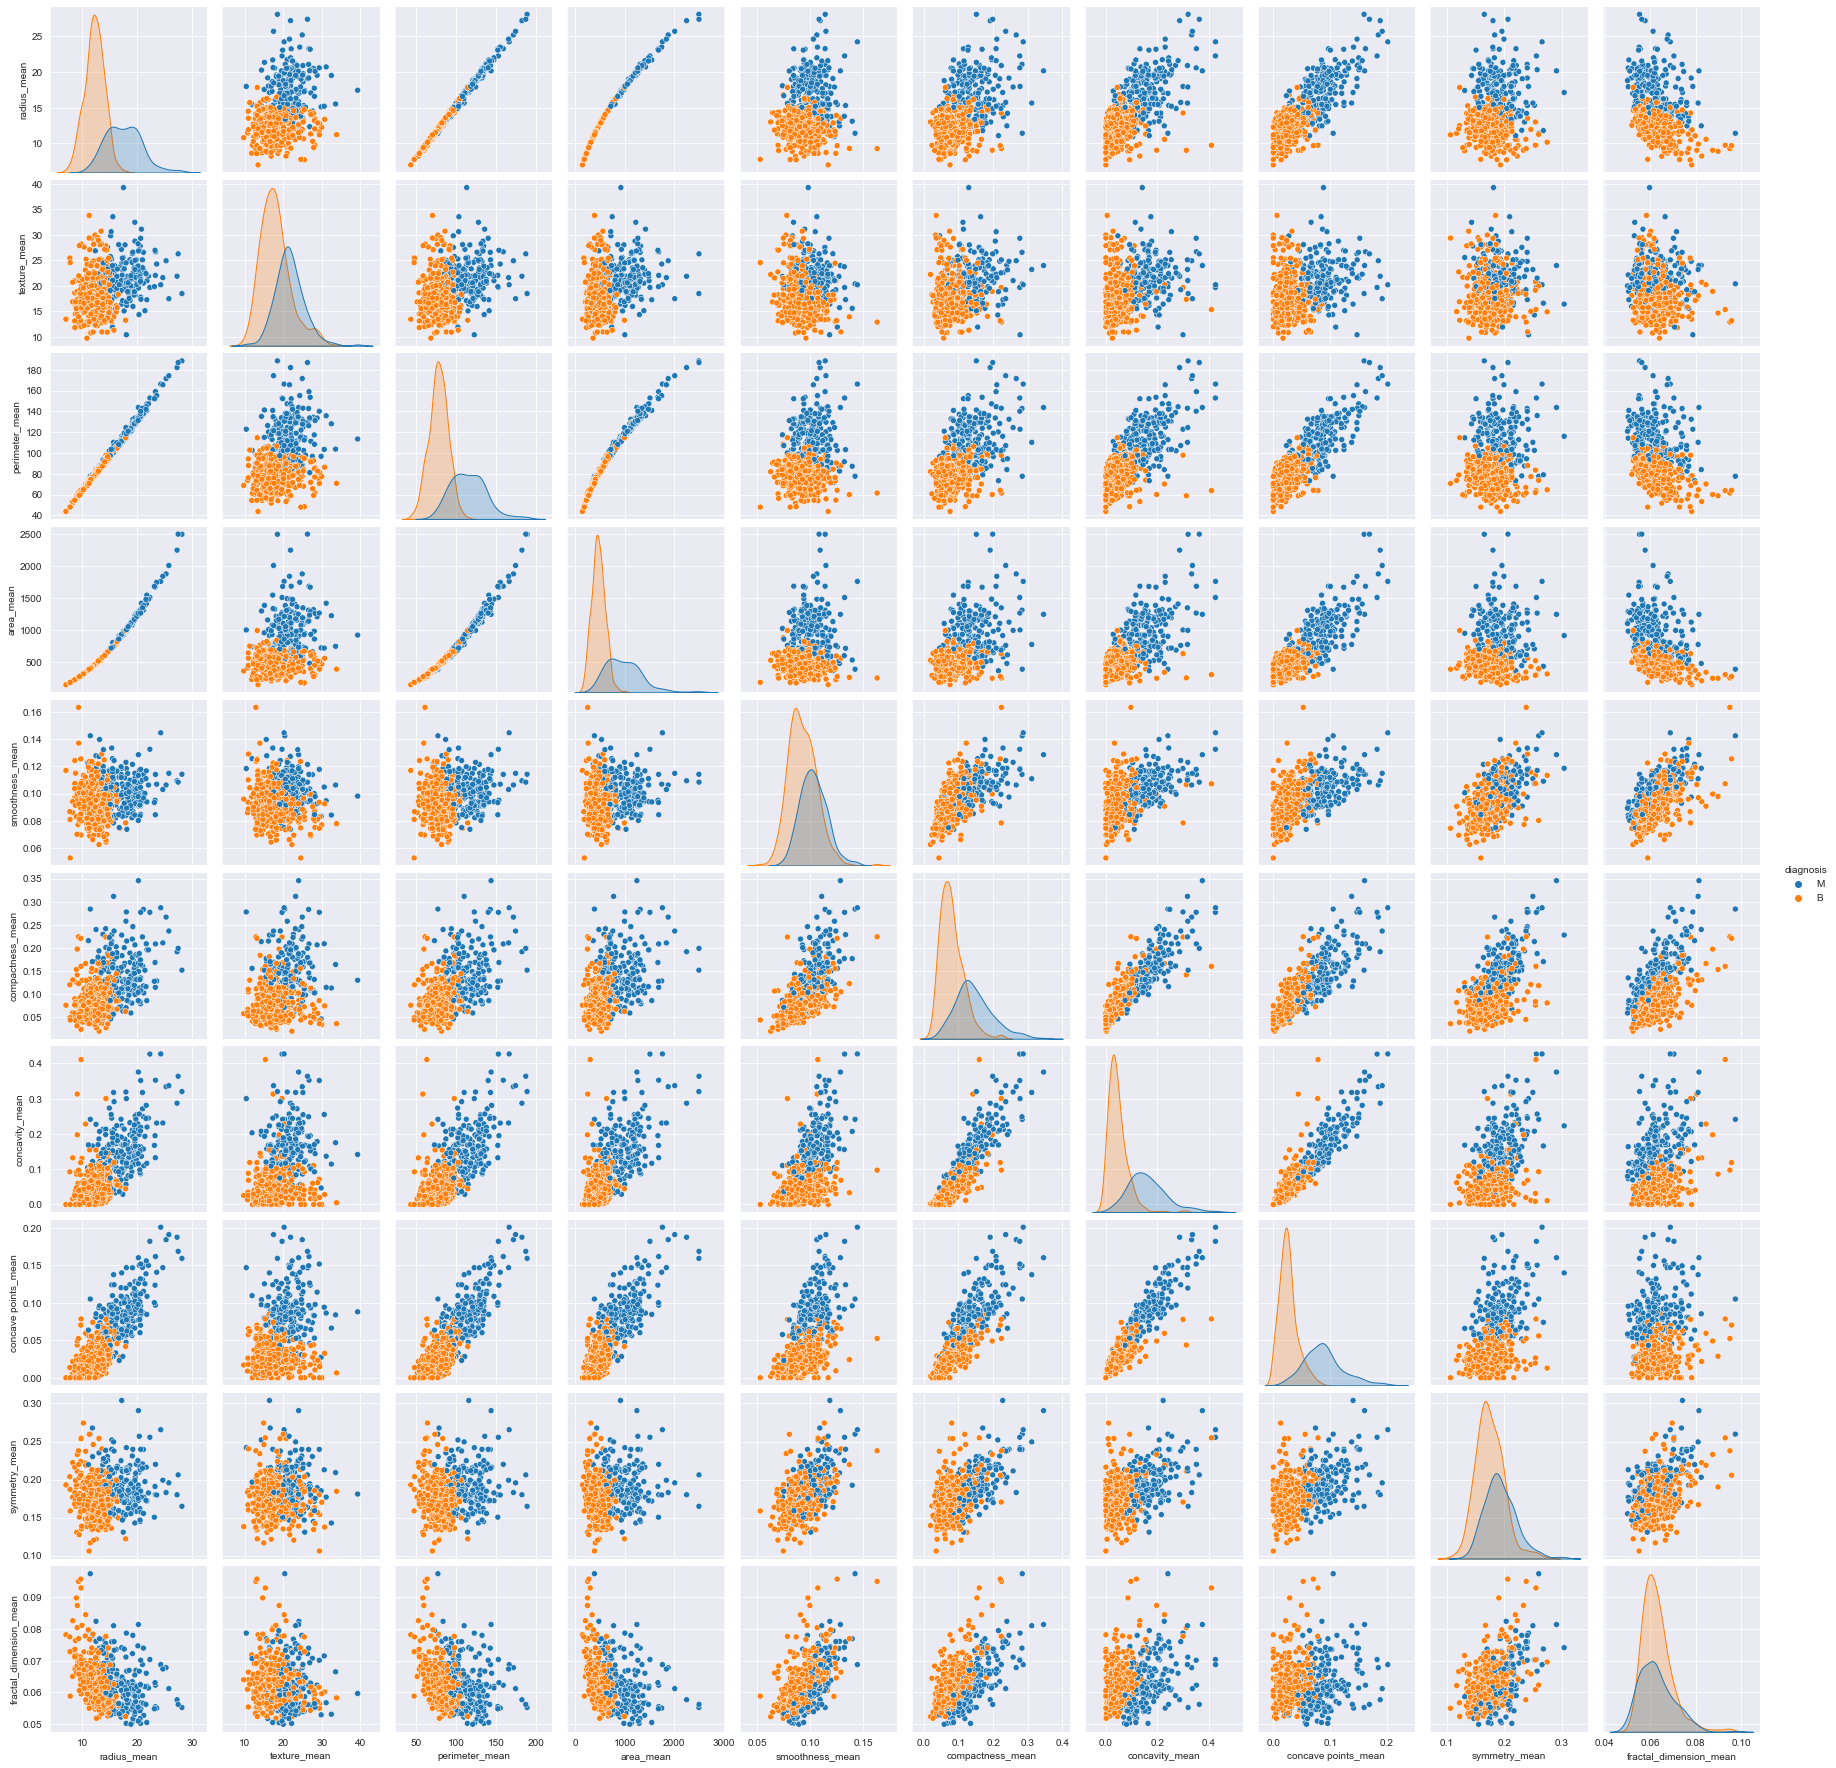

In [95]:
sns.pairplot(bcdata, hue='diagnosis', vars=mean_names)
plt.show()


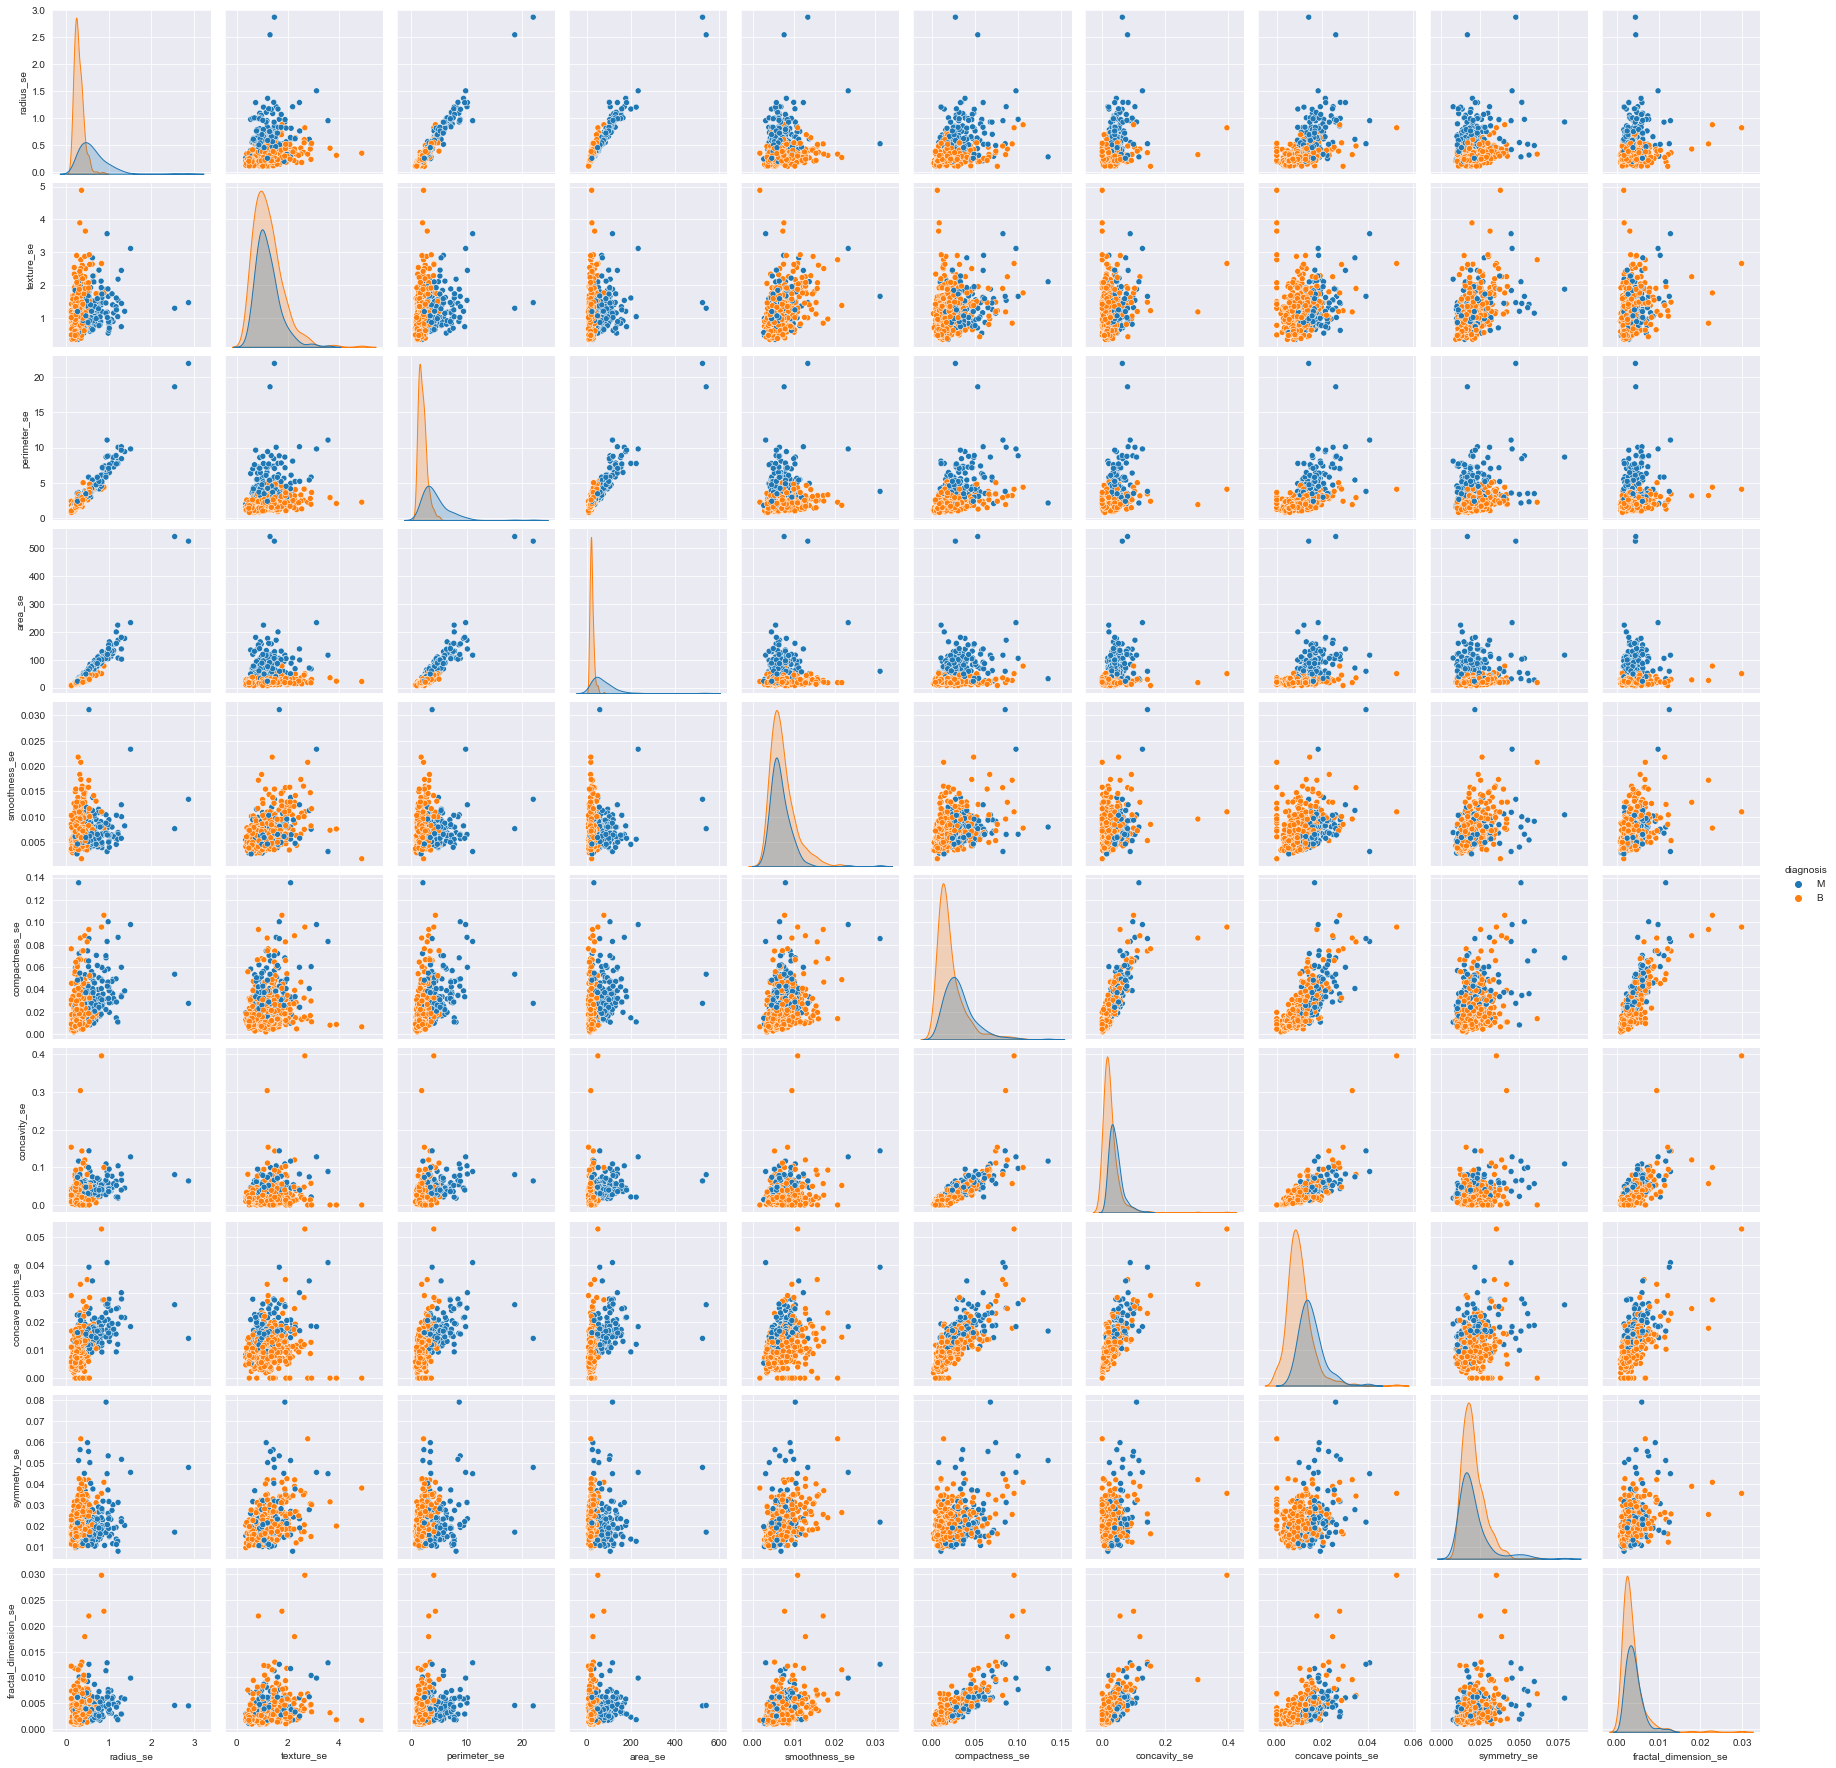

In [96]:
sns.pairplot(bcdata, hue='diagnosis', vars=se_names)
plt.show()

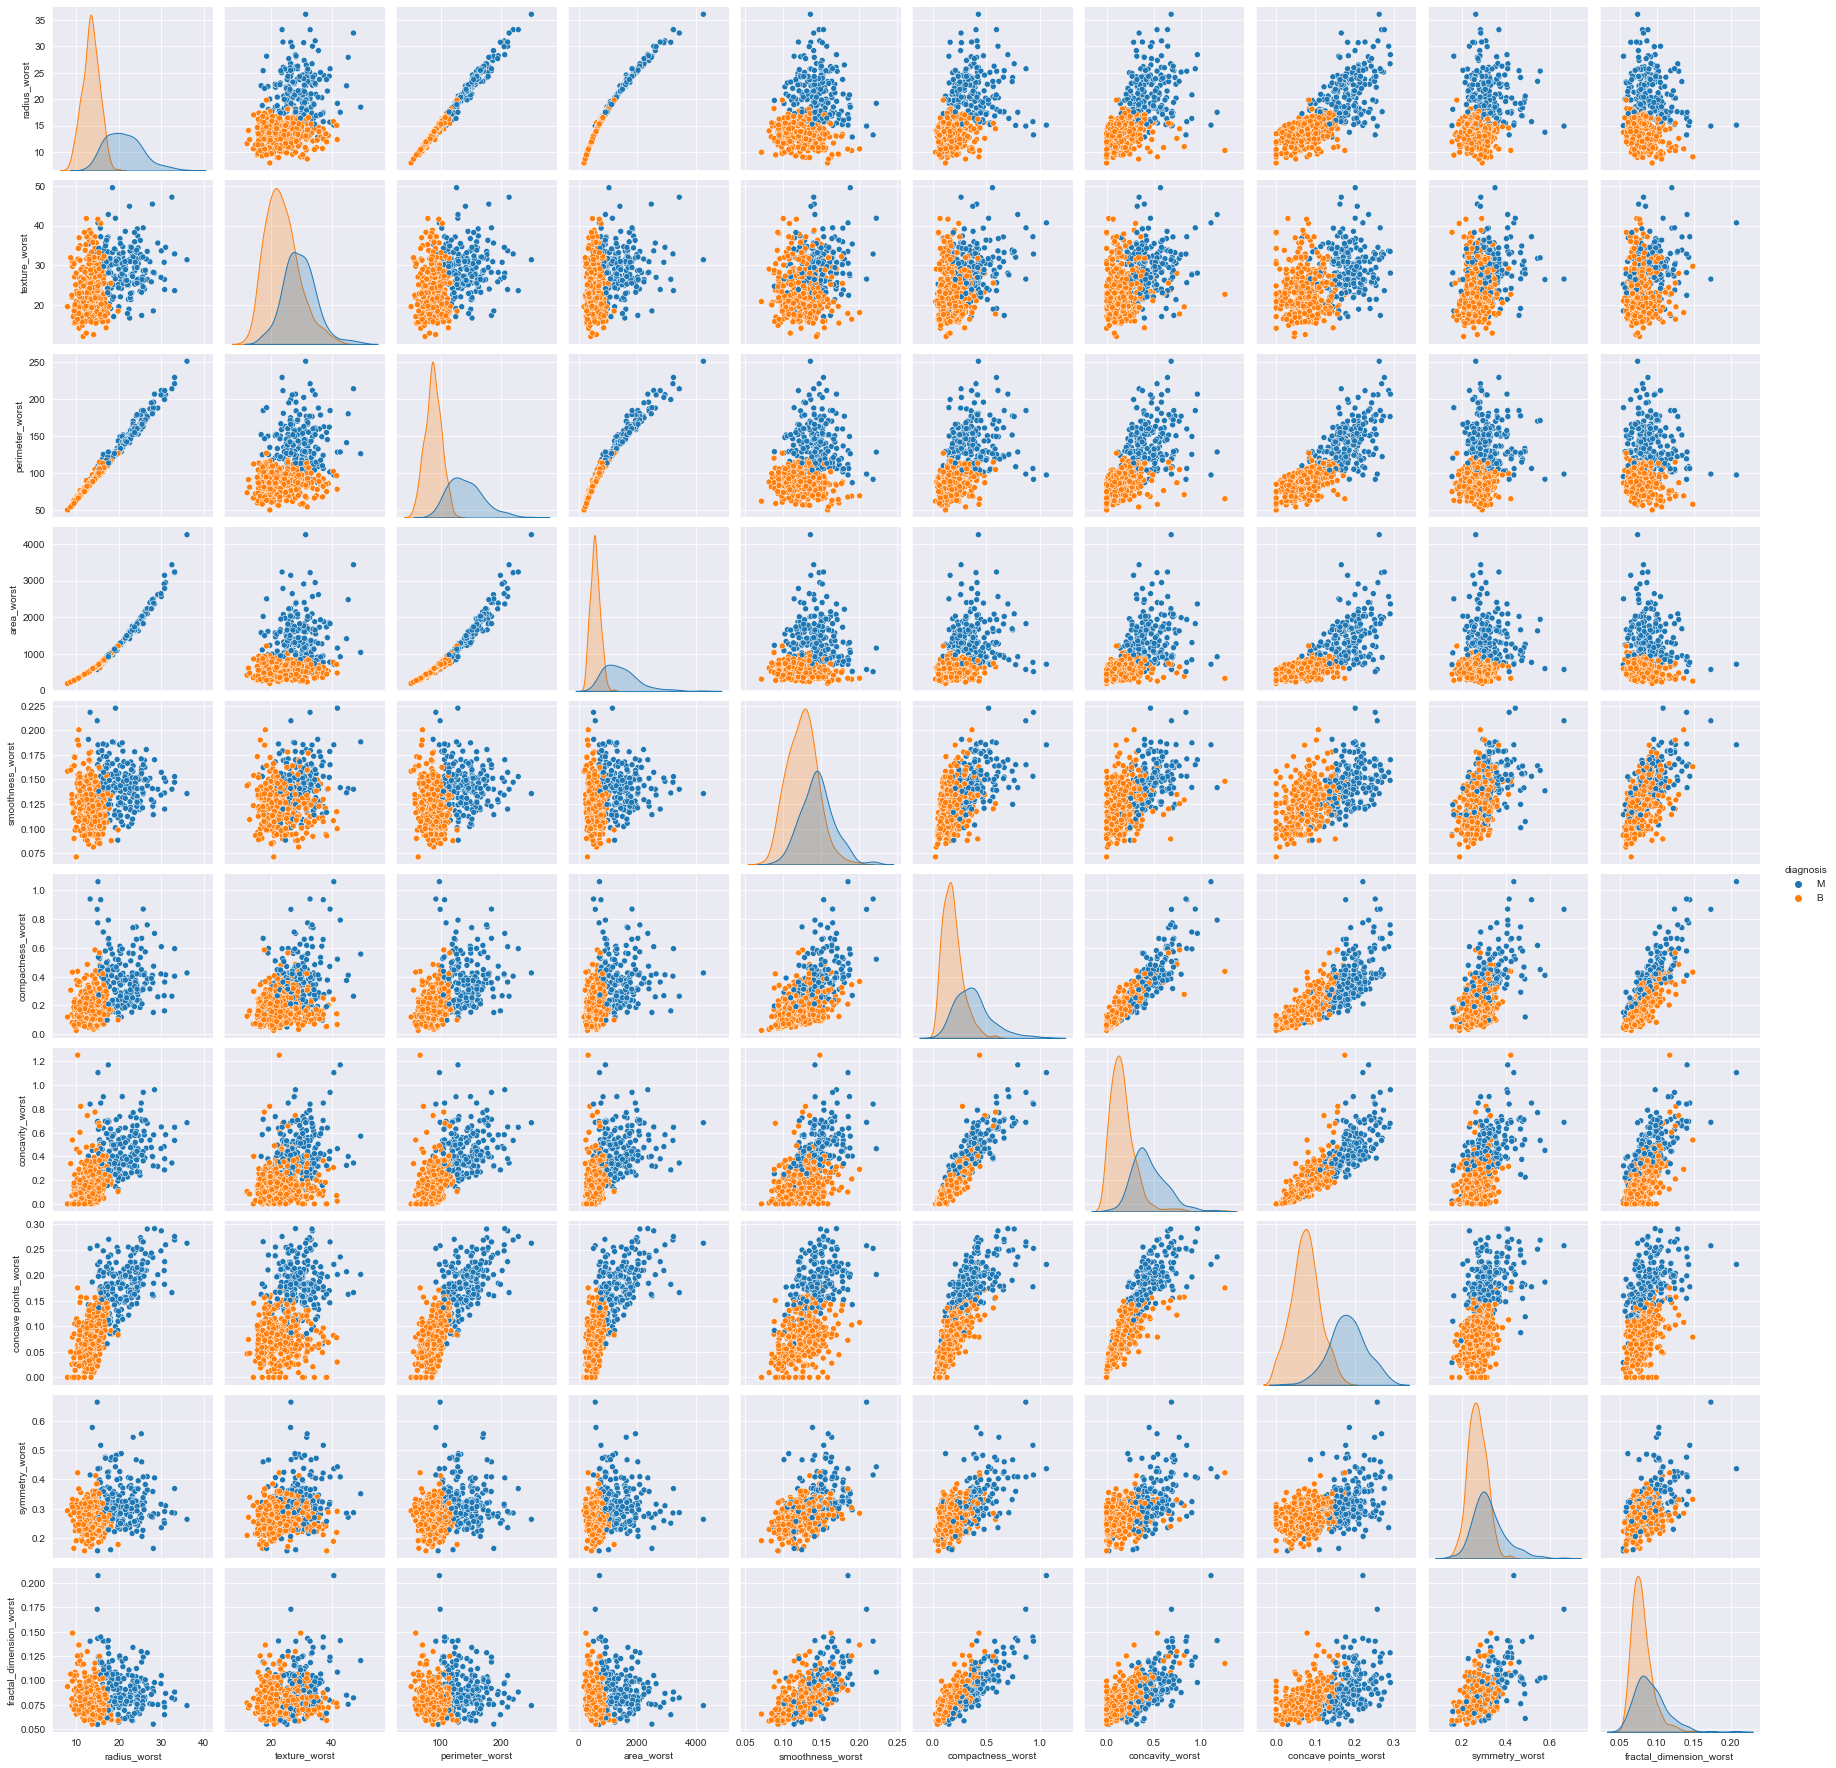

In [97]:
sns.pairplot(bcdata, hue='diagnosis', vars=worst_names)
plt.show()

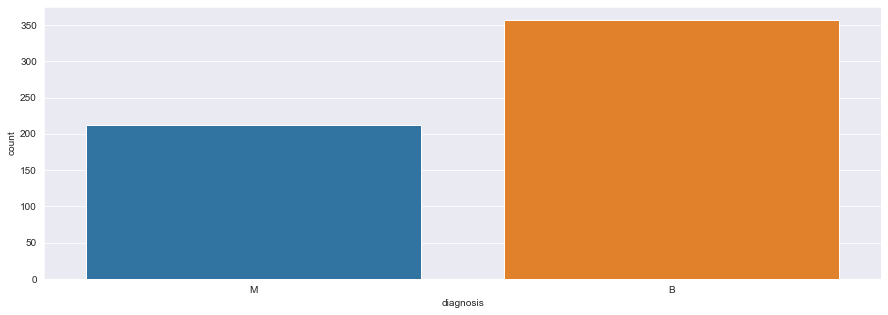

In [98]:
##this is staying the same because were lookng for balance in diagnosis

sns.countplot(x=bcdata['diagnosis'])
plt.show()

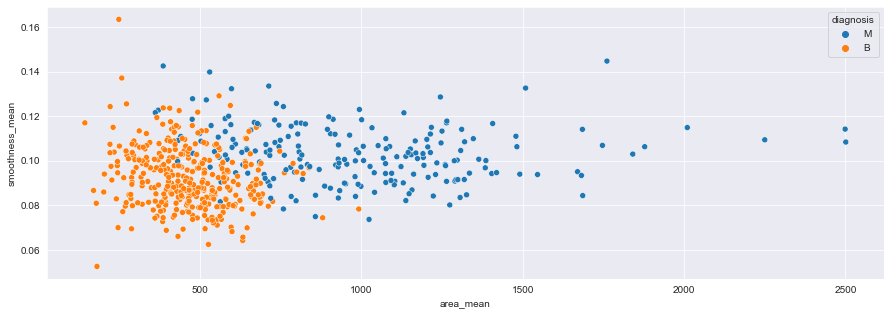

In [99]:
sns.scatterplot(x = 'area_mean', y = 'smoothness_mean', hue = 'diagnosis', data = bcdata)
plt.show()


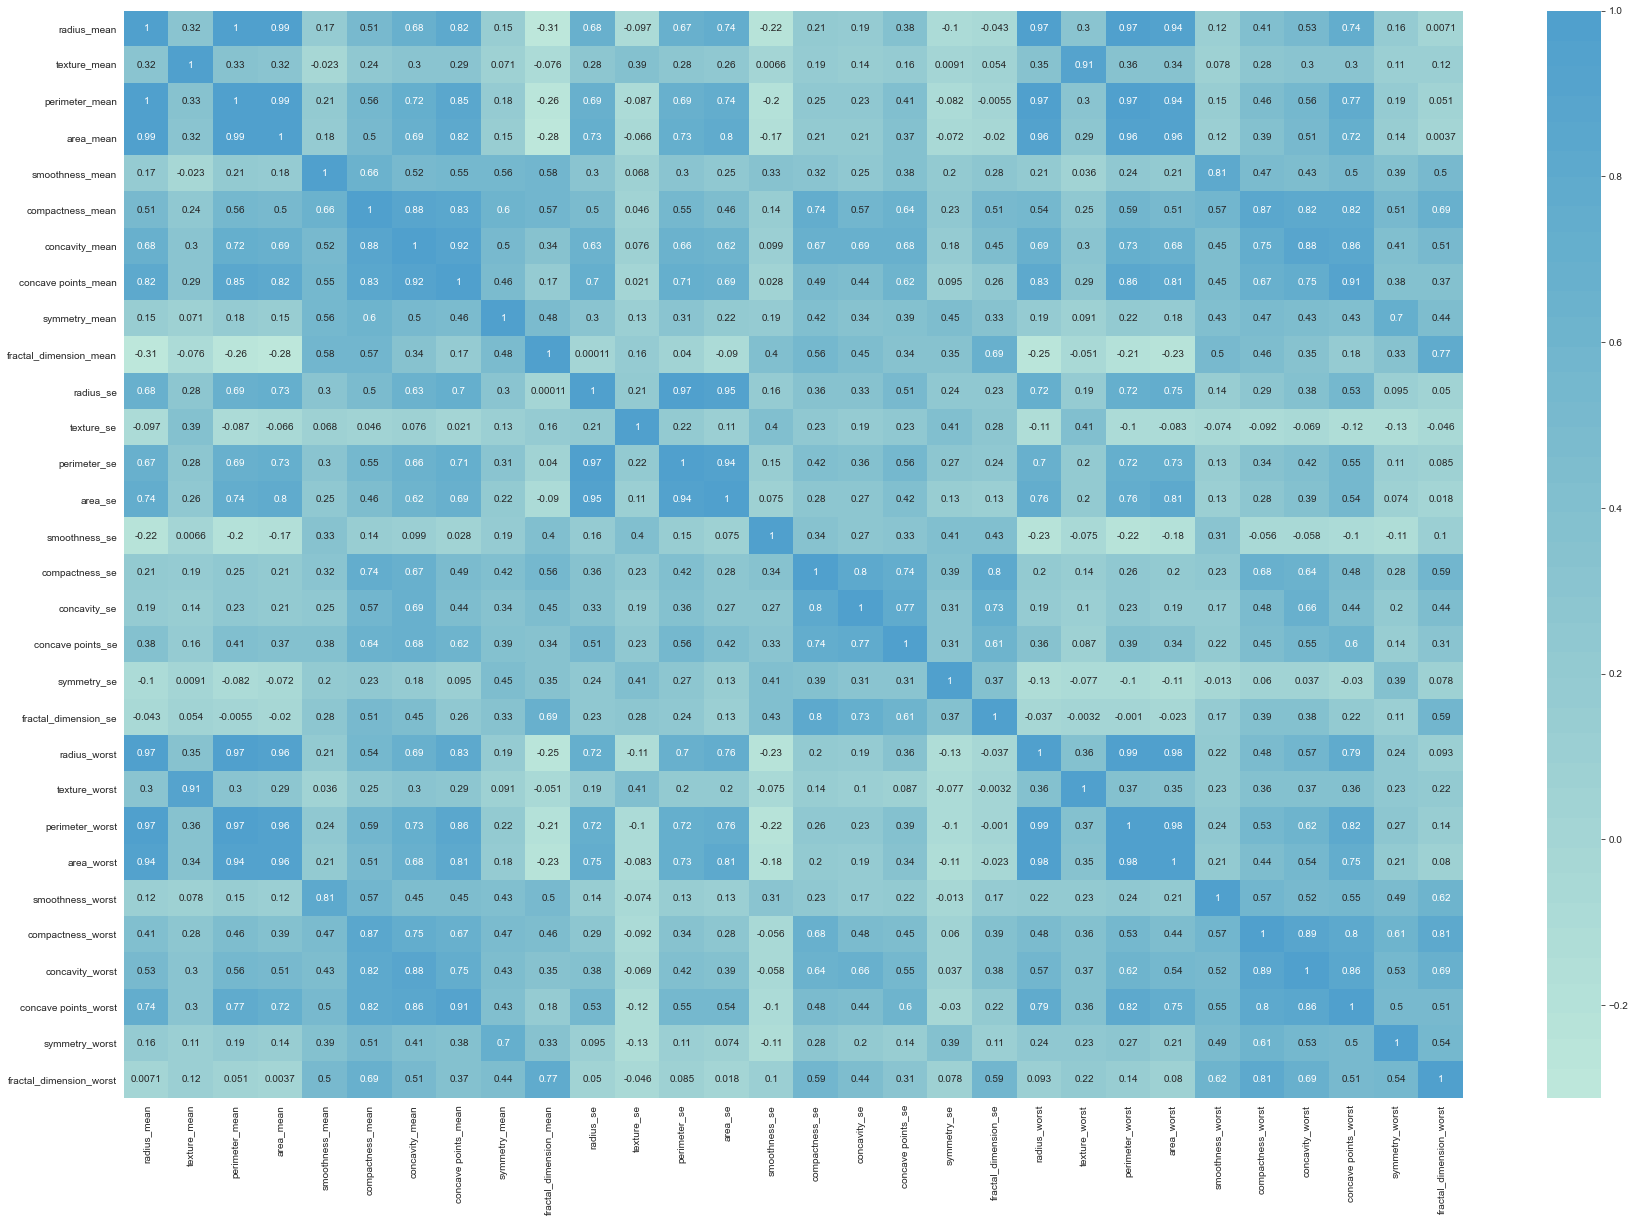

In [100]:
plt.figure(figsize=(30,20))
sns.heatmap(bcdata.corr(), annot=True, center = 4)
plt.show()

In [101]:
bcdata_copy = bcdata.copy()

In [102]:
bcdata_copy = bcdata_copy.drop(columns = ['diagnosis','perimeter_mean', 'radius_mean','texture_se', 'perimeter_se', 'symmetry_se'])


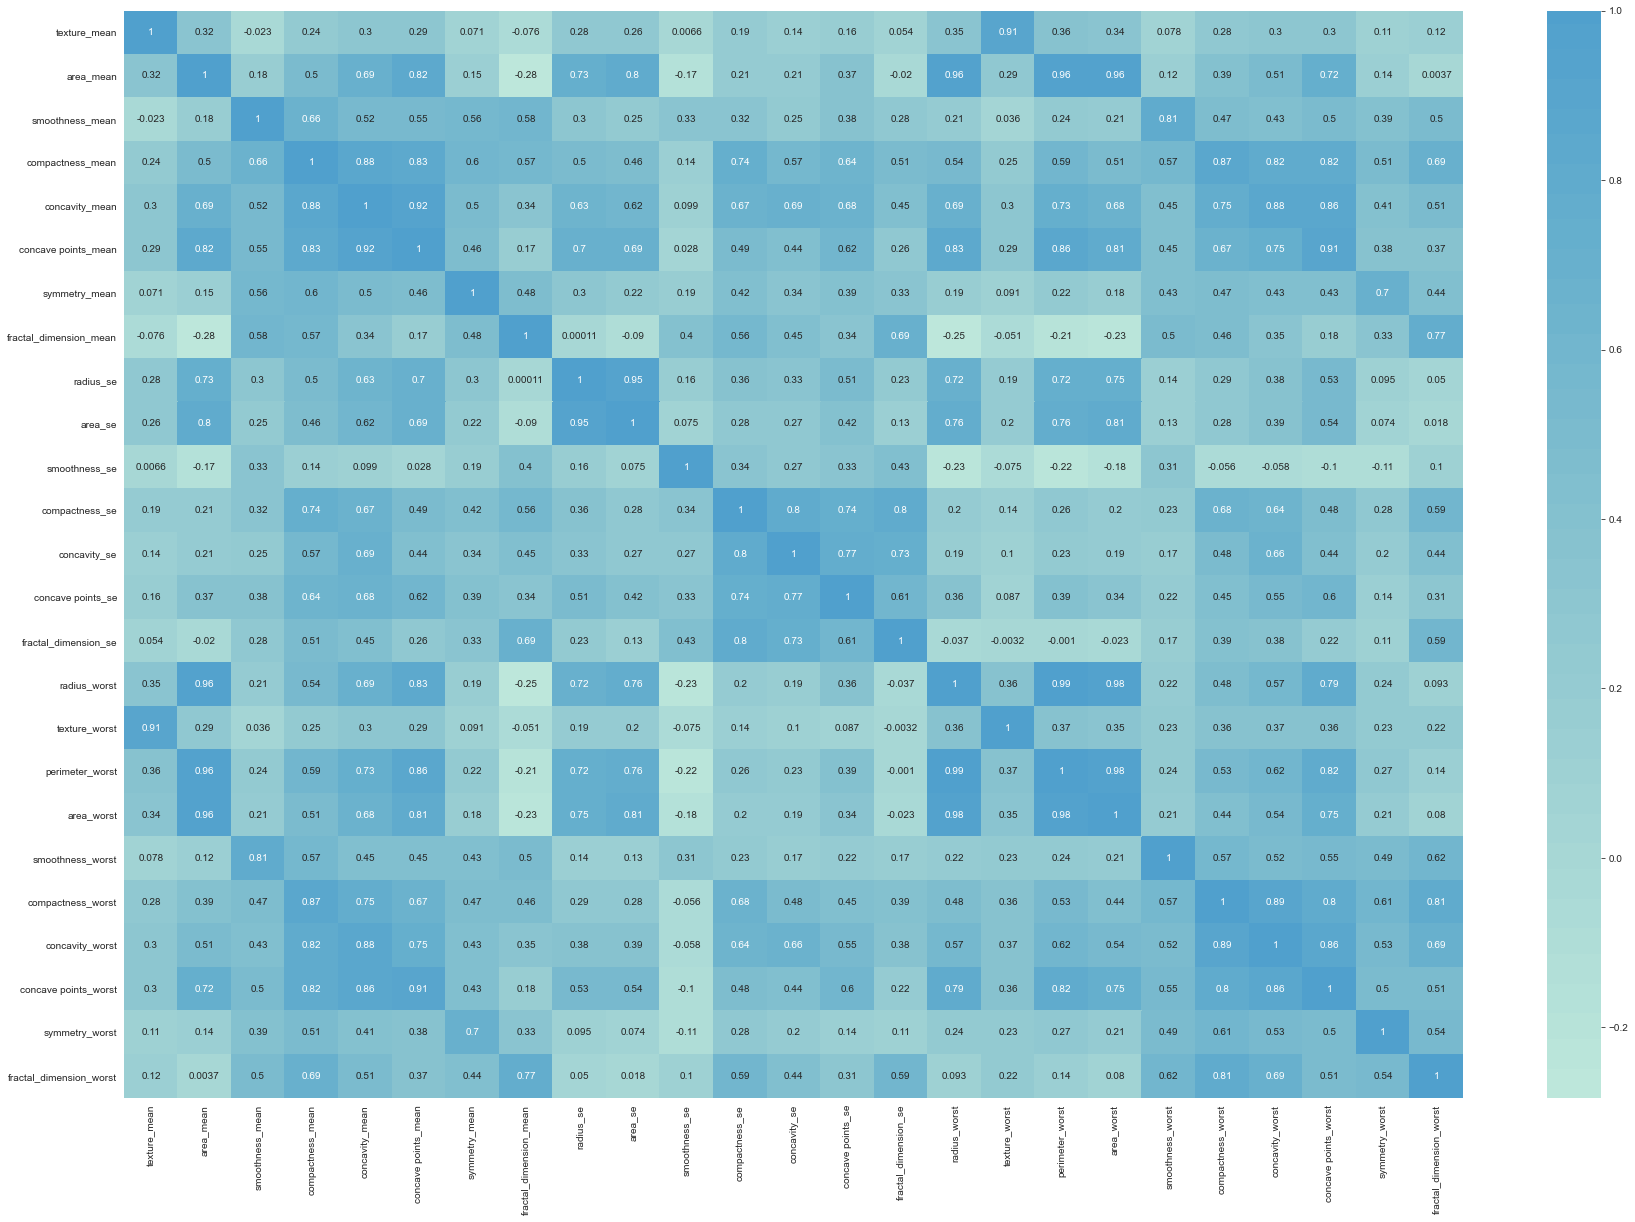

In [103]:
plt.figure(figsize=(30,20))
sns.heatmap(bcdata_copy.corr(), annot=True, center = 4)
plt.show()

In [104]:
Y = bcdata['diagnosis']
X = bcdata.drop('diagnosis', axis=1)

In [107]:
scaler = MinMaxScaler()
X_sc = scaler.fit_transform(X) ##turns this into a numpy, so we have to use pd.dataframe to explicitly convert it into pd df 

X = pd.DataFrame(data=X_sc, columns= X.columns)
X.tail()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
564     0.690000      0.428813        0.678668   0.566490         0.526948   
565     0.622320      0.626987        0.604036   0.474019         0.407782   
566     0.455251      0.621238        0.445788   0.303118         0.288165   
567     0.644564      0.663510        0.665538   0.475716         0.588336   
568     0.036869      0.501522        0.028540   0.015907         0.000000   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
564          0.296055        0.571462             0.690358       0.336364   
565          0.257714        0.337395             0.486630       0.349495   
566          0.254340        0.216753             0.263519       0.267677   
567          0.790197        0.823336             0.755467       0.675253   
568          0.074351        0.000000             0.000000       0.266162   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
564                0.132056  ...      0.623266       0.383262   
565                0.113100  ...      0.560655       0.699094   
566                0.137321  ...      0.393099       0.589019   
567                0.425442  ...      0.633582       0.730277   
568                0.187026  ...      0.054287       0.489072   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
564         0.576174    0.452664          0.461137           0.178527   
565         0.520892    0.379915          0.300007           0.159997   
566         0.379949    0.230731          0.282177           0.273705   
567         0.668310    0.402035          0.619626           0.815758   
568         0.043578    0.020497          0.124084           0.036043   

     concavity_worst  concave points_worst  symmetry_worst  \
564         0.328035              0.761512        0.097575   
565         0.256789              0.559450        0.198502   
566         0.271805              0.487285        0.128721   
567         0.749760              0.910653        0.497142   
568         0.000000              0.000000        0.257441   

     fractal_dimension_worst  
564                 0.105667  
565                 0.074315  
566                 0.151909  
567                 0.452315  
568                 0.100682  

[5 rows x 30 columns]

In [110]:
##create model

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.3, random_state=98)

svm_m = SVC()
svm_m.fit(X_train, Y_train)

SVC()

In [112]:
preds = svm_m.predict(X_test)
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           B       0.98      0.98      0.98       112
           M       0.97      0.97      0.97        59

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [128]:
parameter_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
##model, dict of parameters want to try
grid = GridSearchCV(SVC(), parameter_grid, verbose=5) ##theres another one that tests subsets, grid search cv

In [129]:
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=5)

In [126]:
##this outputs the best chosen parameter. 
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [131]:
grid_predictions = grid.predict(X_test)

In [133]:
print(classification_report(Y_test, grid_predictions))

              precision    recall  f1-score   support

           B       0.97      0.96      0.96       112
           M       0.92      0.95      0.93        59

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

